In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## UCI Breast Cancer Classification using scikit-learn and XGBoost
    
    *  Exploratory data analysis using pandas, seaborn plotting and scikit-learn feature selection
    *  Data preprocessing including splitting, scaling and balancing data (SMOTEENN, SVMSMOTE algorithms)
    *  Classification using Logistic Regression, Random Forest and XGBClassifier
    *  Hyperparameter tuning of XGBClassifier parameters using RandomizedSearchCV of scikit-learn
    *  Plotting of the train, test and fit data
    -----
    *  The best training accuracy (~99.8%) comes from a XGBClassifier on SVMSMOTE balanced data but with a test accuracy of only 90.6% indicating significant overfitting. 
    *  The best test accuracy (~95.0%) comes from Logistic Regression, RandomForestClassifier and XGBClassifier all fit on SMOTEENN balanced data. 
    

In [2]:
# If using jupyter themes
import jupyterthemes as jt
jt.jtplot.style(theme = 'grade3',ticks=True)

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
bc_dataset = load_breast_cancer()

In [6]:
print(bc_dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [7]:
feature_names = bc_dataset['feature_names']

In [8]:
feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [9]:
target_names = bc_dataset['target_names']
target_names

array(['malignant', 'benign'], dtype='<U9')

In [10]:
features = bc_dataset['data']
targets = bc_dataset['target']

In [11]:
features.shape

(569, 30)

In [12]:
targets.shape

(569,)

In [13]:
bc_features_df = pd.DataFrame(data = features[:,:10], columns=feature_names[:10])
bc_features_df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [14]:
bc_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
mean radius               569 non-null float64
mean texture              569 non-null float64
mean perimeter            569 non-null float64
mean area                 569 non-null float64
mean smoothness           569 non-null float64
mean compactness          569 non-null float64
mean concavity            569 non-null float64
mean concave points       569 non-null float64
mean symmetry             569 non-null float64
mean fractal dimension    569 non-null float64
dtypes: float64(10)
memory usage: 44.5 KB


In [15]:
bc_targets_df = pd.DataFrame(data = targets, columns=['Class'])
bc_targets_df.head(5)

,Class
0,0
1,0
2,0
3,0
4,0


In [16]:
bc_targets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 1 columns):
Class    569 non-null int64
dtypes: int64(1)
memory usage: 4.5 KB


In [17]:
num_classes = bc_targets_df.nunique().values
num_classes

array([2])

In [18]:
bc_targets_df['Class'].value_counts()

1    357
0    212
Name: Class, dtype: int64

In [19]:
bc_dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

    * malignant: 0, benign: 1

### Exploratory Data Analysis

#### Checking the distribution of each feature

In [20]:
bc_features_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


    * Features such as mean concavity, concave points, area have a high std. 

In [21]:
# Plotting the distribution
import seaborn as sns

In [22]:
sns.set(style = 'ticks')

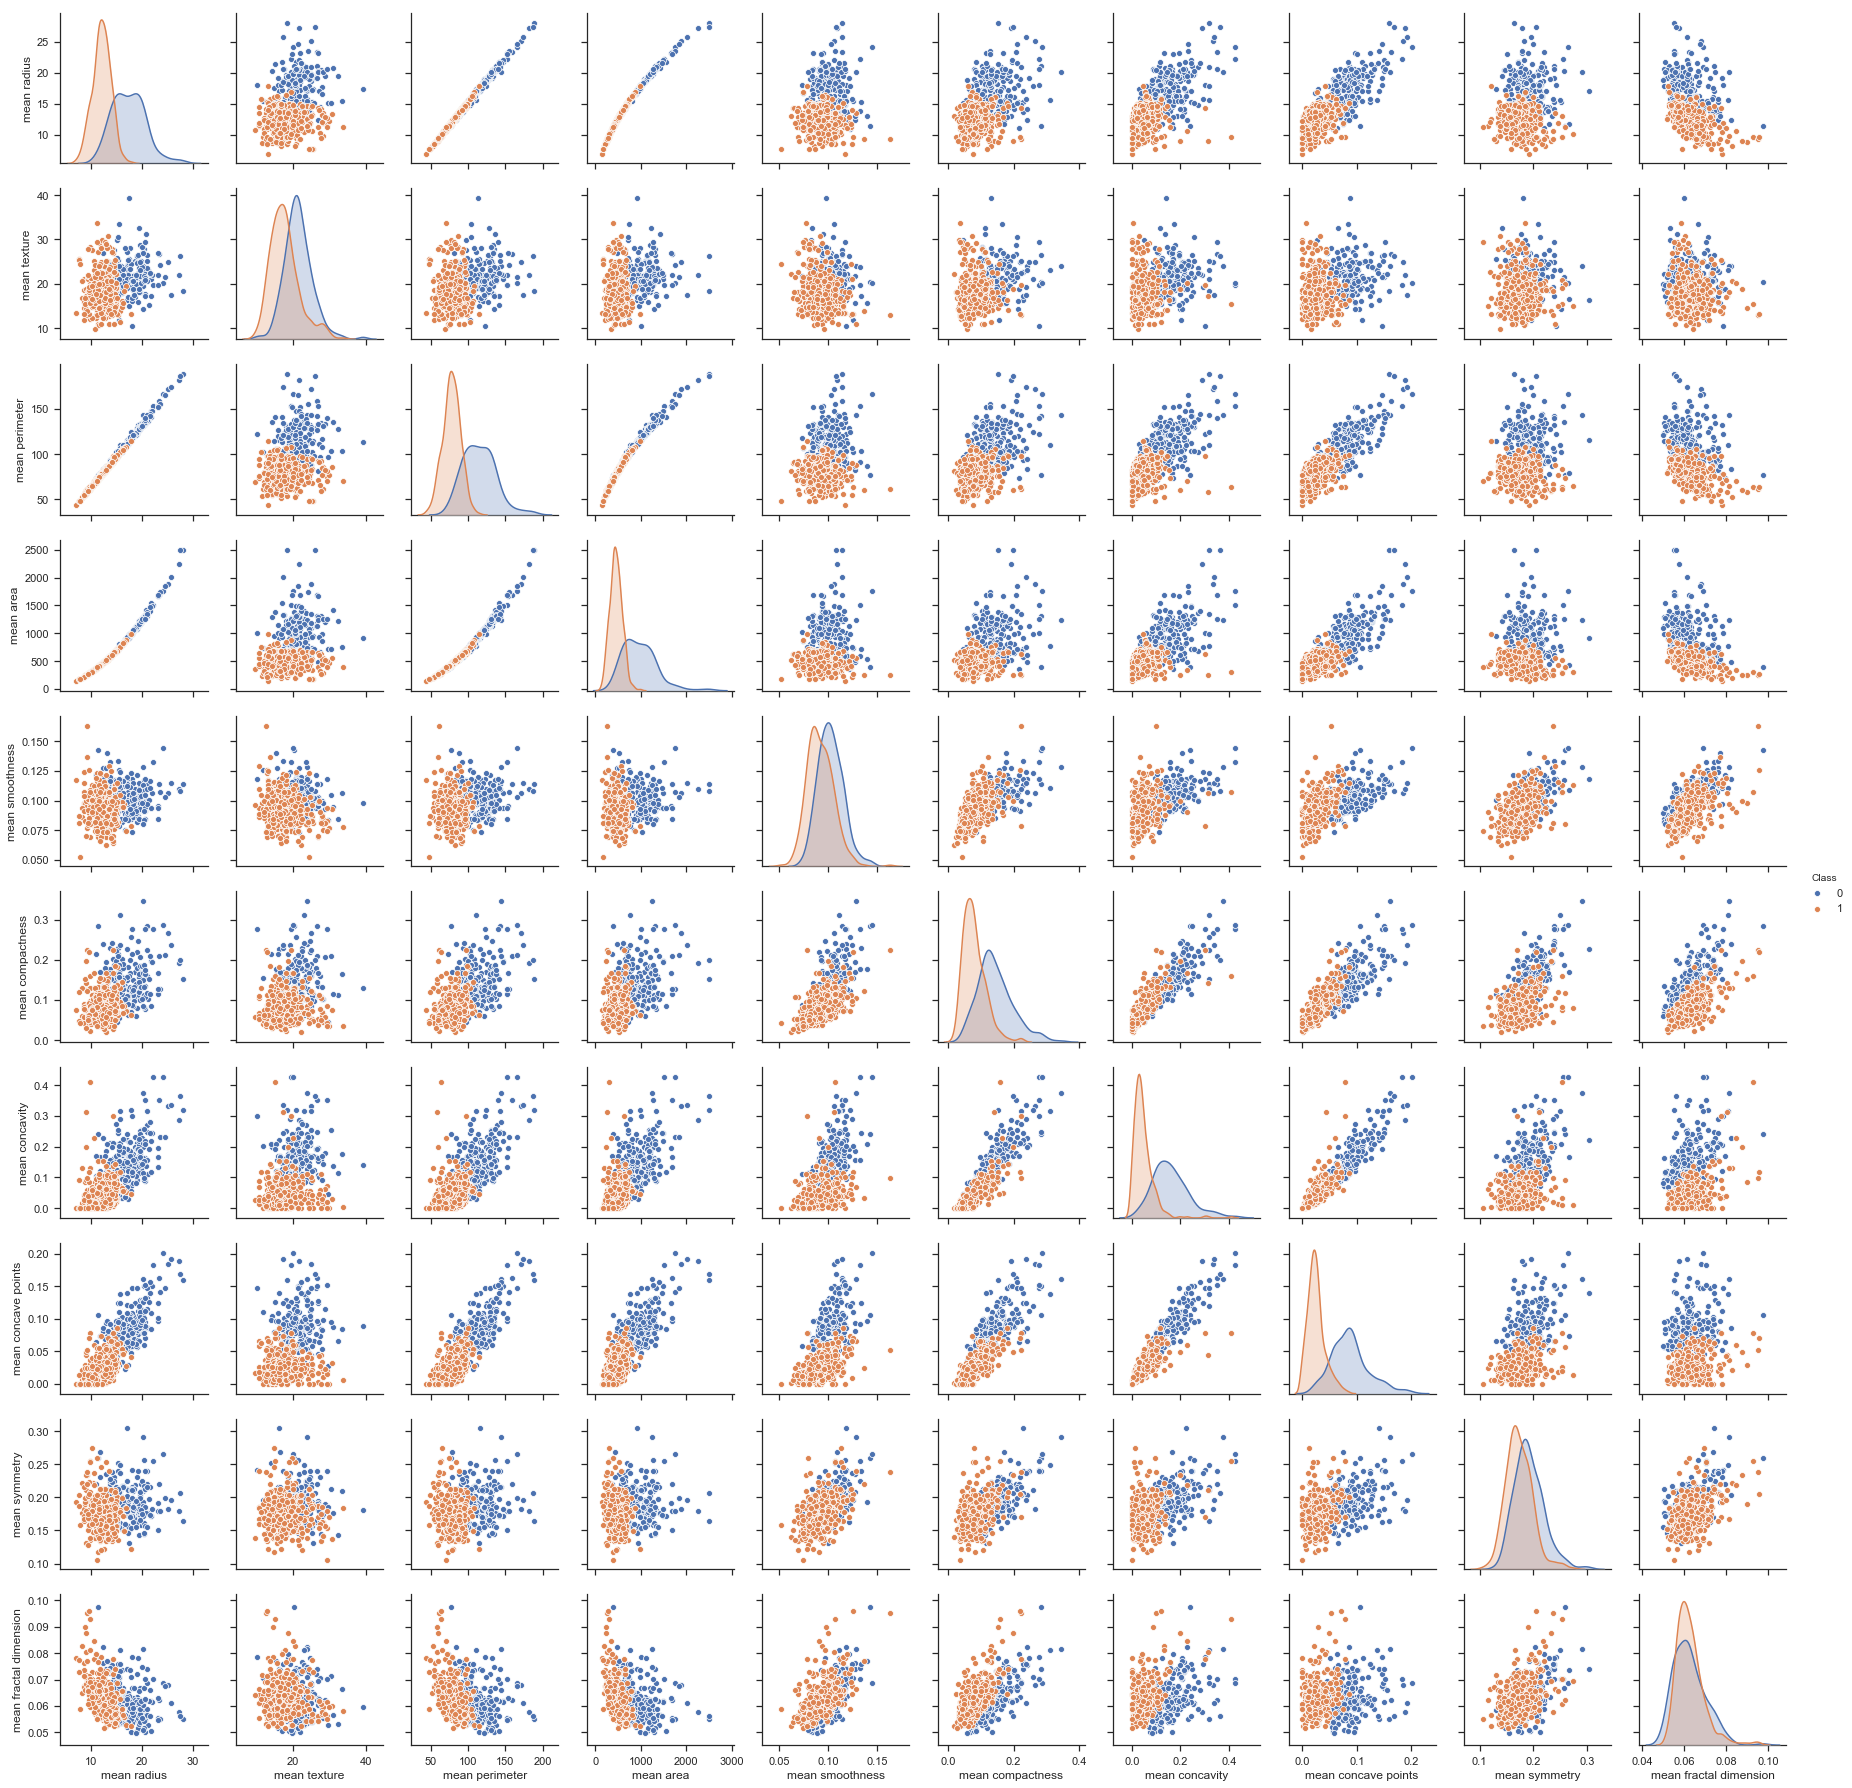

In [23]:
sns.pairplot(pd.concat([bc_targets_df, bc_features_df], axis=1), hue = 'Class', vars = bc_features_df.columns)

    * From the above plots, obviously only one of radius, perimeter and area should be considered as a feature.
    
    * Mean symmetry, smoothness and texture are similar between the two types of the cells. Fractal dimension could probably be used as a feature.
    

In [24]:
# Correlations between different features
bc_features_df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


In [25]:
feature_corr =  bc_features_df.corr(method='pearson')
mask = np.zeros_like(feature_corr)

In [26]:
mask[np.triu_indices_from(mask)] = True

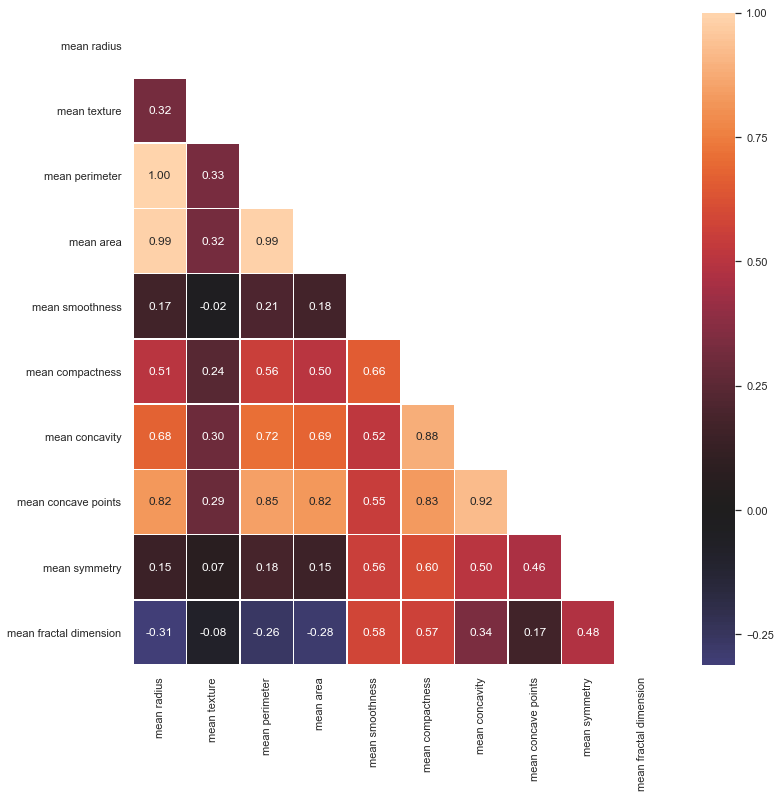

In [27]:
plt.figure(figsize=(12,12))

with sns.axes_style(style='white'):
    sns.heatmap(feature_corr, mask = mask, annot=True, fmt = "0.2f",linewidths=0.5, center=0)

    * High correlation (> 0.9) between concavity and concave points. Hence, only one will be used as a predictor; in this case, concavity.

    * From the pairplots and heatmap, the features that will be chosen as predictors, in the 1st iteration, are radius, compactness, concavity and fractal dimension.
    
    * Scikit-learn's feature_selection algorithms sucah as Recursive feature elimiation, or L1 regularization can also be used to select features (dimensionality reduction).

In [28]:
bc_features_df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension'],
      dtype='object')

In [29]:
chosen_features = bc_features_df.columns[[0,5,6,9]]
chosen_features

Index(['mean radius', 'mean compactness', 'mean concavity',
       'mean fractal dimension'],
      dtype='object')

#### Comparing Feature Selection using Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import clone

In [31]:
feat_imp = RandomForestClassifier(n_estimators=100, criterion='gini')
feat_imp_2 = clone(feat_imp)

In [32]:
col = bc_features_df.columns.to_list()
col

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension']

In [33]:
# since radius, perimeter and area are related, only one is required. 
del col[2:4:1]
col

['mean radius',
 'mean texture',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension']

In [34]:
# Similarly, mean concave points can be dropped due to its correlation with concavity
del col[col.index('mean concave points')]
col

['mean radius',
 'mean texture',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean symmetry',
 'mean fractal dimension']

In [35]:
feat_imp.fit(X=bc_features_df[col], y = bc_targets_df.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

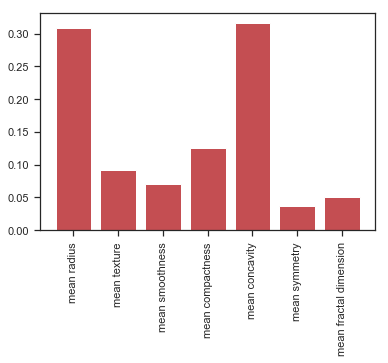

In [36]:
plt.bar(col, height=feat_imp.feature_importances_, color = 'r')
plt.xticks(rotation = 'vertical')

In [37]:
pd.DataFrame(data = feat_imp.feature_importances_, index=col).sort_values(by = 0, ascending=False)

,0
mean concavity,0.316391
mean radius,0.308903
mean compactness,0.126127
mean texture,0.091758
mean smoothness,0.069853
mean fractal dimension,0.050813
mean symmetry,0.036155


##### Applying the classifier on the manually chosen features

In [38]:
feat_imp_2.fit(X=bc_features_df[chosen_features], y = bc_targets_df.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

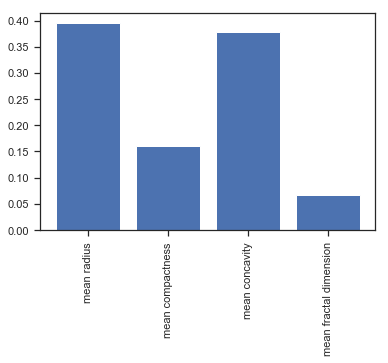

In [39]:
plt.bar(chosen_features, height=feat_imp_2.feature_importances_)
plt.xticks(rotation = 'vertical')

In [40]:
pd.DataFrame(data = feat_imp_2.feature_importances_, index=chosen_features).sort_values(by = 0, ascending=False)

,0
mean radius,0.395286
mean concavity,0.377249
mean compactness,0.161255
mean fractal dimension,0.066210


    * From the above estimations, fractal dimension can be omitted. The chosen features will be radius, concavity, compactness and texture 

In [41]:
bc_features_df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension'],
      dtype='object')

In [42]:
chosen_features = bc_features_df.columns[[0,1,5,6]]

In [43]:
feature_dataset = bc_features_df[chosen_features]
feature_dataset.head(5)

,mean radius,mean texture,mean compactness,mean concavity
0,17.99,10.38,0.27760,0.3001
1,20.57,17.77,0.07864,0.0869
2,19.69,21.25,0.15990,0.1974
3,11.42,20.38,0.28390,0.2414
4,20.29,14.34,0.13280,0.1980


### Data Preprocessing

#### Train, Test datasets

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
random_seed = 100

In [46]:
X_train, X_test, y_train, y_test = train_test_split(feature_dataset.values, bc_targets_df.values, test_size = 0.3, 
                                                    random_state = np.random.RandomState(seed = random_seed), 
                                                    shuffle=True, stratify = bc_targets_df)

In [47]:
X_train.shape

(398, 4)

In [48]:
y_train.shape

(398, 1)

In [49]:
np.bincount(y_train.ravel())

array([148, 250])

In [50]:
np.bincount(y_test.ravel())

array([ 64, 107])

#### Scaling

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler = StandardScaler()

In [53]:
scaler_fit = scaler.fit(X_train)

In [54]:
X_train_std = scaler_fit.transform(X_train)

In [55]:
X_test_std = scaler_fit.transform(X_test)

In [56]:
type(X_train_std)

numpy.ndarray

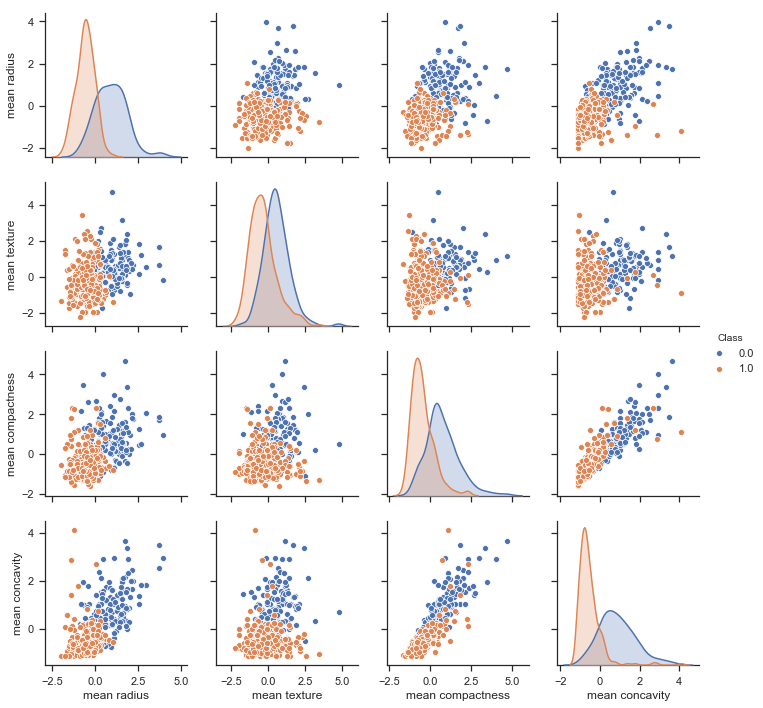

In [57]:
sns.pairplot(pd.DataFrame(data = np.hstack([y_train, X_train_std]), columns = np.hstack(['Class',feature_dataset.columns])), hue = 'Class', vars = feature_dataset.columns)

#### Resampling because of class imbalance
https://github.com/scikit-learn-contrib/imbalanced-learn

In [58]:
import imblearn

##### Over-sampling followed by under-sampling

In [59]:
smoteenn = imblearn.combine.SMOTEENN(sampling_strategy='minority', random_state=random_seed)

In [60]:
X_train_smoteenn, y_train_smoteenn = smoteenn.fit_resample(X_train_std, y_train.ravel())

In [61]:
y_train_smoteenn.shape

(403,)

In [62]:
np.bincount(y_train_smoteenn)

array([204, 199])

In [63]:
np.bincount(y_train.ravel())

array([148, 250])

##### Over-sampling the minority class

In [64]:
# Default settings
svmsmote = imblearn.over_sampling.SVMSMOTE(sampling_strategy='minority', random_state=random_seed)

In [65]:
X_train_svmsmote, y_train_svmsmote = svmsmote.fit_resample(X_train_std, y_train.ravel())

In [66]:
y_train_svmsmote.shape

(500,)

In [67]:
np.bincount(y_train_svmsmote)

array([250, 250])

### Classifiers

In [68]:
from sklearn.linear_model import LogisticRegression
# from sklearn.mixture import GaussianMixture
from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
from xgboost.sklearn import XGBClassifier
# from catboost import CatBoostClassifier
# from lightgbm.sklearn import LGBMClassifier

#### Using Logistic Regression as the Base Classifier

In [69]:
logReg = LogisticRegression(class_weight='balanced', random_state=random_seed, penalty='l2', C=1.0)

##### Fitting on unbalanced data

In [70]:
logReg.fit(X_train_std, y_train.ravel())

/home/sameer/datascience/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=100, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
logReg.score(X_test_std, y_test.ravel())

0.9415204678362573

##### Fitting on SMOTEEN balanced data

In [72]:
logReg.fit(X_train_smoteenn, y_train_smoteenn)

/home/sameer/datascience/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=100, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
logReg.score(X_test_std, y_test.ravel())

0.9532163742690059

##### Fitting on SVMSMOTE balanced data

In [74]:
logReg.fit(X_train_svmsmote, y_train_svmsmote)

/home/sameer/datascience/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=100, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
logReg.score(X_test_std, y_test.ravel())

0.9298245614035088

        * For the default settings, SMOTEENN balanced data has the highest accuracy score. Hence, the base score is 95.3%

### Plotting

    * Plotting by reducing the dimensions using PCA

In [76]:
from sklearn.decomposition import PCA

In [77]:
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

In [78]:
def plot_decision_regions(X_train_std, y_train, X_test_std, y_test, classifier, pca_dim = '2D', meshgrid_2d_points=100, classifier_name = 'Name'):
    """Using PCA to reduce the dimensions to 2 or 3 and then use scatter
    plot to visualize
    
    Parameters
    ==========
    classifier: classifier used to fit the data
    
    pca_dim: str; either 2D or 3D
    
    meshgrid_2d_points: int; if 2D, the number of points per axis for contour plot
    
    classifier_name: str; name of the classifier for the title of the plot
    
    """
    
    if pca_dim[0] == '2' or '3':
        n_comp = int(pca_dim[0])
    else:
        return print('Dimension error: needs to be either 2D or 3D')
    
    dimension_reduction = PCA(n_components=n_comp)
    dimension_reduction.fit(X_train_std)
    X_train_pca = dimension_reduction.transform(X_train_std)
    X_test_pca = dimension_reduction.transform(X_test_std)
    X = np.vstack([X_train_std, X_test_std])
    # Axes boundaries
    x_min = np.min(X, axis = 0)
    x_min = x_min * (1 - 0.01)
    x_max = np.max(X, axis = 0)
    x_max = x_max * (1 + 0.01)
    
    # Predicted using the classifier
    y_predicted = classifier.predict(X_test_std)
    
    # Plotting
    fig = plt.figure(figsize=(20,8))
    colors = ['red', 'cyan']
    markers = ["s","o", "+"]
    cmap = ListedColormap(['darkmagenta', 'honeydew'])
#     cmap = ListedColormap([list(CSS4_COLORS)[i] for i in np.random.randint(0, len(CSS4_COLORS)-1, 2)])
    for j in range(1,3):
        if n_comp==3:
            ax = fig.add_subplot(1,2,j, projection='3d')
            ax.set_xlim(x_min[0], x_max[0])
            ax.set_ylim(x_min[1], x_max[1])
            ax.set_zlim(x_min[2], x_max[2])
            ax.set_xlabel('PCA X_1')
            ax.set_ylabel('PCA X_2')
            ax.set_zlabel('PCA X_3')

            if j==1:
                for i,c in zip(bc_targets_df.Class.unique(), colors):
                    ax.scatter(X_train_pca[y_train.ravel()==i][:,0], X_train_pca[y_train.ravel()==i][:,1], X_train_pca[y_train.ravel()==i][:,2], marker = markers[0],
                              c=c, label = i)
                    ax.legend(loc='upper left')
                    ax.set_title('Training data', fontsize = 18)
            else:
                for i,c in zip(bc_targets_df.Class.unique(), colors):
                    ax.scatter(X_test_pca[y_test.ravel()==i][:,0], X_test_pca[y_test.ravel()==i][:,1], X_test_pca[y_test.ravel()==i][:,2], marker = markers[1],
                              c=c, edgecolor = 'k', label = 'Test ' + str(i))
                    ax.scatter(X_test_pca[y_predicted==i][:,0], X_test_pca[y_predicted==i][:,1], X_test_pca[y_predicted==i][:,2], s=100, marker = markers[2], c=c,
                              label = 'Predicted ' +  str(i))
                    ax.legend(loc='best')
                    ax.set_title('Test data', fontsize = 18)  
        
        else:              
            ax = fig.add_subplot(1,2,j)
            ax.set_xlim(x_min[0], x_max[0])
            ax.set_ylim(x_min[1], x_max[1])
            ax.set_xlabel('PCA X_1')
            ax.set_ylabel('PCA X_2')
            
            xx1,xx2 = np.meshgrid(np.linspace(x_min[0], x_max[0], meshgrid_2d_points), 
                                              np.linspace(x_min[1], x_max[1], meshgrid_2d_points))
            z = classifier.predict_proba(dimension_reduction.inverse_transform(np.vstack([xx1.ravel(), xx2.ravel()]).T))
            z = z[:,0].reshape(xx1.shape)
            
            ax.pcolormesh(xx1, xx2, z, cmap=cmap)
            
            #drawing a contour line using the probability threshold (0.5 in this case)
            CS = ax.contour(xx1, xx2, z, [0.5], linewidths=2, colors='k')
            fmt = str(CS.levels[0])
            ax.clabel(CS, CS.levels,fmt = fmt)

            if j==1:
                for i,c in zip(bc_targets_df.Class.unique(), colors):
                    ax.scatter(X_train_pca[y_train.ravel()==i][:,0], X_train_pca[y_train.ravel()==i][:,1], marker = markers[0],
                              c=c, label = i)
                    ax.legend(loc='upper left')
                    ax.set_title('Training data', fontsize = 18)
            else:
                for i,c in zip(bc_targets_df.Class.unique(), colors):
                    ax.scatter(X_test_pca[y_test.ravel()==i][:,0], X_test_pca[y_test.ravel()==i][:,1], marker = markers[1],
                              c=c, edgecolor = 'k', label = 'Test ' + str(i))
                    ax.scatter(X_test_pca[y_predicted==i][:,0], X_test_pca[y_predicted==i][:,1], s=100, marker = markers[2], c=c,
                              label = 'Predicted ' +  str(i))
                    ax.legend(loc='best')
                    ax.set_title('Test data', fontsize = 18) 

    fig.suptitle(classifier_name, y=0.9)
    plt.show()

#### Plotting the data fitted with Logistic Regression

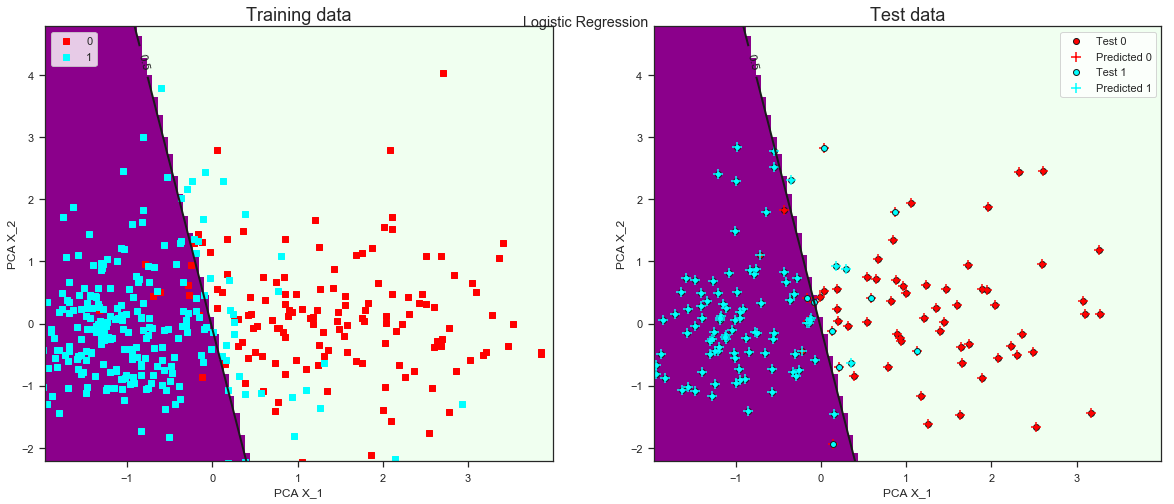

In [79]:
plot_decision_regions(X_train_std, y_train, X_test_std, y_test, classifier=logReg, pca_dim='2D',classifier_name='Logistic Regression')

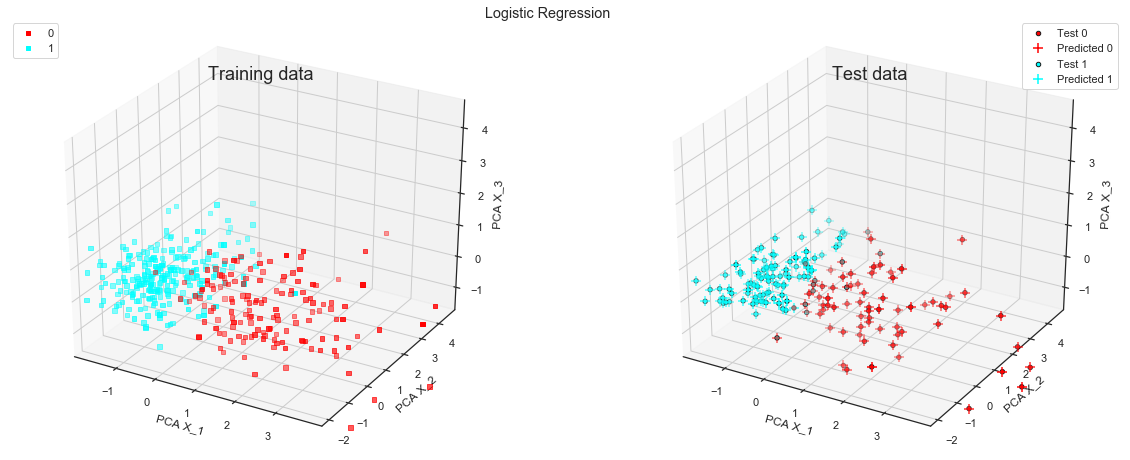

In [80]:
plot_decision_regions(X_train_std, y_train, X_test_std, y_test, classifier=logReg,pca_dim='3D',classifier_name='Logistic Regression')

#### Random Forest

In [81]:
rand_forst = RandomForestClassifier(n_estimators=100, max_depth=5, bootstrap=True, random_state=random_seed)

##### Fitting on unbalanced dataset

In [82]:
# Fitting on unbalanced dataset
rand_forst.fit(X_train_std, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [83]:
rand_forst.score(X_test_std, y_test)

0.9415204678362573

##### Fitting on SMOTEENN balanced data

In [84]:
# SMOTEENN balanced data
rand_forst.fit(X_train_smoteenn, y_train_smoteenn)
rand_forst.score(X_test_std, y_test)

0.9473684210526315

##### Fitting on SVMSMOTE balanced data

In [85]:
rand_forst.fit(X_train_svmsmote, y_train_svmsmote)
rand_forst.score(X_test_std, y_test)

0.9415204678362573

    * The score is similar to the one obtained from Logistic Regression

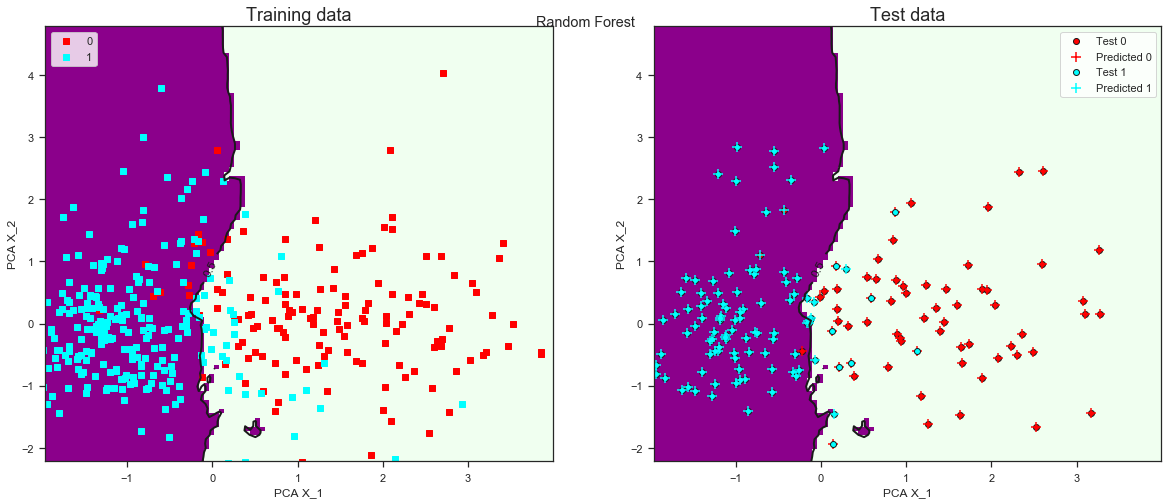

In [86]:
plot_decision_regions(X_train_std, y_train, X_test_std, y_test, classifier=rand_forst, classifier_name='Random Forest')

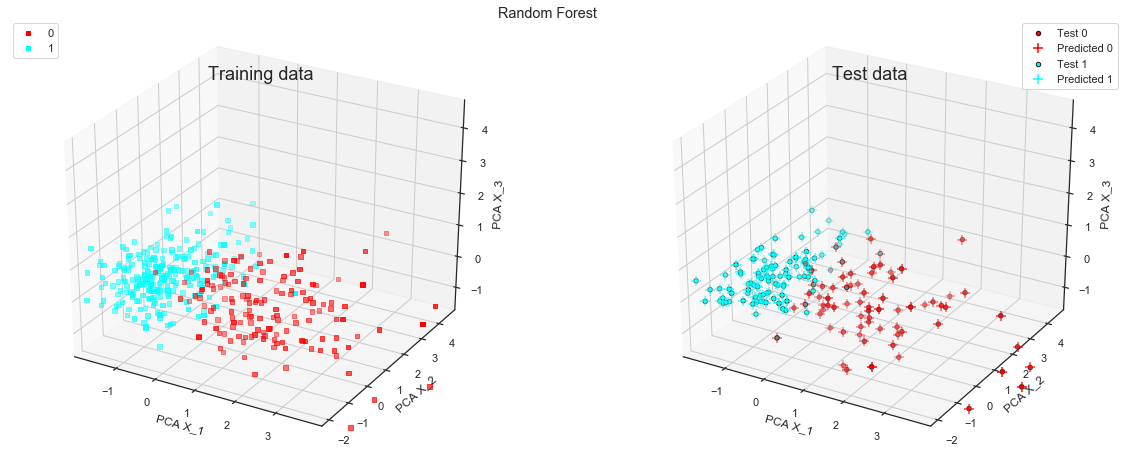

In [87]:
plot_decision_regions(X_train_std, y_train, X_test_std, y_test, classifier=rand_forst, pca_dim='3D',classifier_name='Random Forest')

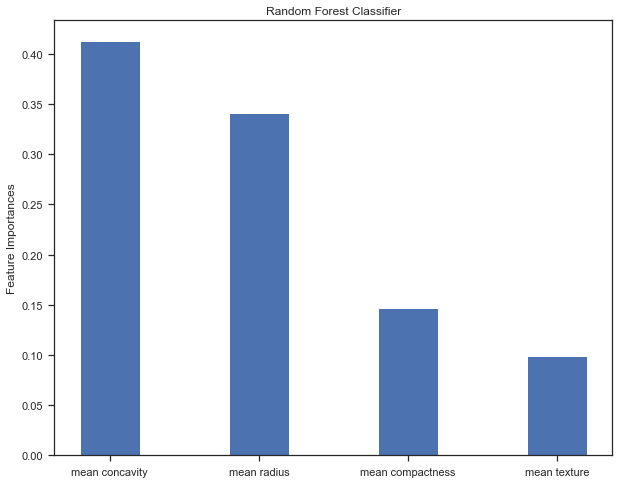

In [88]:
plt.figure(figsize = (10,8))
plt.bar(x = feature_dataset.columns[np.argsort(rand_forst.feature_importances_)][::-1], 
        height = rand_forst.feature_importances_[np.argsort(rand_forst.feature_importances_)][::-1], width=0.4)
plt.ylabel('Feature Importances')
plt.title('Random Forest Classifier')
plt.show()

### XGBoost

In [89]:
xgbClass = XGBClassifier(objective='binary:logistic', booster='gbtree', reg_lambda=1, random_state=random_seed)

##### Fitting on unbalanced data

In [90]:
xgbClass.fit(X_train_std, y_train.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [91]:
xgbClass.score(X_test_std, y_test.ravel())

0.9473684210526315

##### Fitting on SMOTEENN balanced data

In [92]:
xgbClass.fit(X_train_smoteenn, y_train_smoteenn)
xgbClass.score(X_test_std, y_test.ravel())

0.9473684210526315

##### Fitting on SVMSMOTE balanced data

In [93]:
xgbClass.fit(X_train_svmsmote, y_train_svmsmote)
xgbClass.score(X_test_std, y_test)

0.9415204678362573

    * XBGClassier on SVMSMOTE balanced data gives the similar test accuracy on all types of balanced data. However, the accuracy is similar to Logistic Regression

In [94]:
xgbClass.feature_importances_

array([0.24817118, 0.13854226, 0.0851515 , 0.528135  ], dtype=float32)

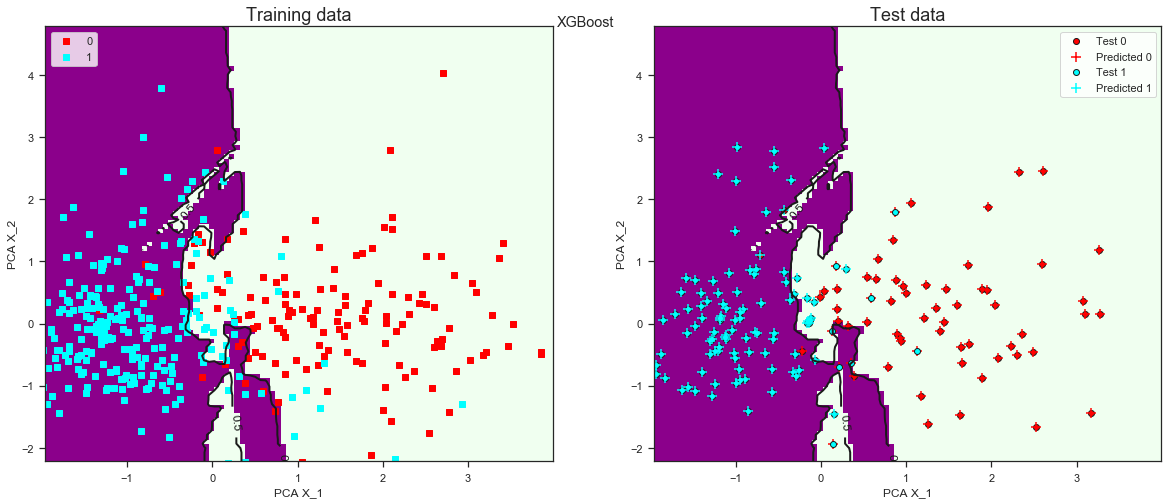

In [95]:
plot_decision_regions(X_train_std, y_train, X_test_std, y_test, classifier=xgbClass, classifier_name='XGBoost')

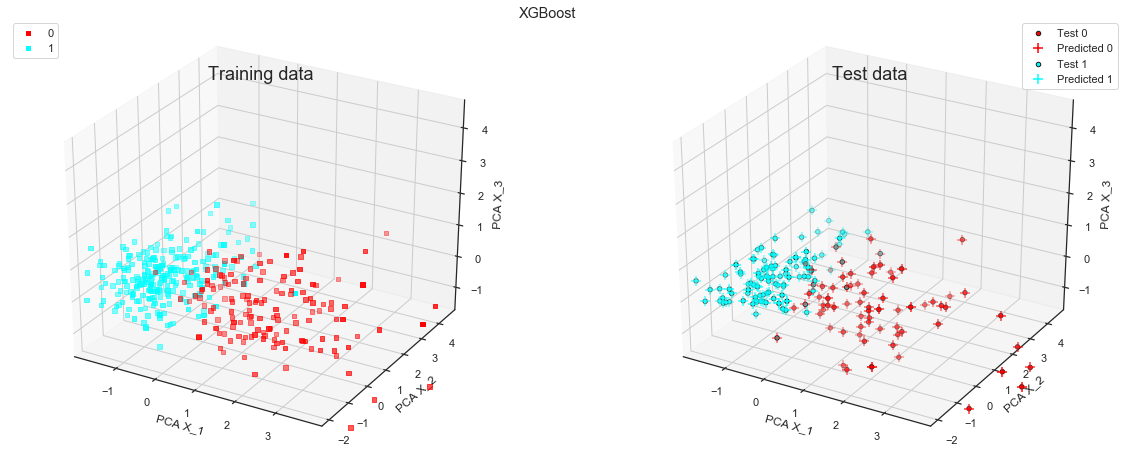

In [96]:
plot_decision_regions(X_train_std, y_train, X_test_std, y_test, classifier=xgbClass, pca_dim = '3D', classifier_name='XGBoost')

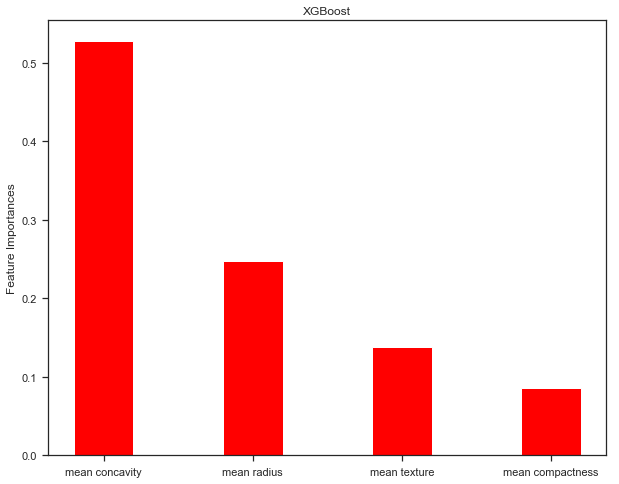

In [97]:
plt.figure(figsize = (10,8))
plt.bar(x = feature_dataset.columns[np.argsort(xgbClass.feature_importances_)][::-1], 
        height = xgbClass.feature_importances_[np.argsort(xgbClass.feature_importances_)][::-1], width=0.4, color = 'red')
plt.ylabel('Feature Importances')
plt.title('XGBoost')
plt.show()

    * XGBoost shows similar importances

### XGBoost Hyperparameter tuning

    XGBoost Parameter Tuning
    https://xgboost.readthedocs.io/en/latest/tutorials/param_tuning.html

In [98]:
from scipy.stats import uniform

In [99]:
eta = uniform(0.01, 1-0.01)
max_depth = range(1,7)
colsample_bytree = uniform(0.1, 1-0.1)

In [100]:
eta.rvs(10)

array([0.48975759, 0.87310429, 0.11090365, 0.79759419, 0.04210729,
       0.29757023, 0.6528644 , 0.79689858, 0.23086151, 0.44587763])

In [101]:
param_dist = {'max_depth': max_depth, 
             'learning_rate': eta.rvs(10),
             'colsample_bytree': colsample_bytree.rvs(10)}

In [102]:
param_dist

{'max_depth': range(1, 7),
 'learning_rate': array([0.24782839, 0.56843001, 0.99823483, 0.75066251, 0.06052455,
        0.34748239, 0.77733951, 0.9394396 , 0.30446021, 0.06551452]),
 'colsample_bytree': array([0.17691292, 0.3583463 , 0.20702236, 0.60702558, 0.66939621,
        0.22772788, 0.23542163, 0.13970798, 0.92219474, 0.54136264])}

In [103]:
from sklearn.model_selection import RandomizedSearchCV

In [104]:
xgb2 = clone(xgbClass)

In [105]:
random_search = RandomizedSearchCV(xgb2, param_distributions=param_dist, n_iter = 20, cv=5,refit=True)

##### Fitting on unbalanced data

In [106]:
random_search.fit(X_train_std, y_train.ravel())

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=100, reg_alpha...
                   param_distributions={'colsample_bytree': array([0.17691292, 0.3583463 , 0.20702236, 0.60702558, 0.66939621,
       0.22772788, 0.23542163, 0.13970798, 0.92219474, 0.54136264]),
                          

In [107]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6070255792405251, gamma=0,
              learning_rate=0.7773395088344939, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [108]:
pd.DataFrame(random_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_learning_rate,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.023815,0.008261,0.001090,0.000519,3,0.77734,0.176913,"{'max_depth': 3, 'learning_rate': 0.7773395088...",0.8875,0.9250,0.9250,0.924051,0.924051,0.917085,0.014845,12
1,0.020055,0.000947,0.000971,0.000300,6,0.750663,0.227728,"{'max_depth': 6, 'learning_rate': 0.7506625081...",0.8750,0.9250,0.9250,0.911392,0.886076,0.904523,0.020510,16
2,0.031594,0.001822,0.000927,0.000066,6,0.0605246,0.607026,"{'max_depth': 6, 'learning_rate': 0.0605245505...",0.9000,0.9750,0.9250,0.924051,0.911392,0.927136,0.025700,2
3,0.021327,0.001475,0.000808,0.000031,2,0.0655145,0.207022,"{'max_depth': 2, 'learning_rate': 0.0655145214...",0.8875,0.9250,0.9125,0.936709,0.924051,0.917085,0.016698,12
4,0.022077,0.002385,0.000835,0.000056,3,0.0655145,0.235422,"{'max_depth': 3, 'learning_rate': 0.0655145214...",0.9000,0.9375,0.9125,0.924051,0.936709,0.922111,0.014404,8
5,0.020058,0.001014,0.000856,0.000272,6,0.998235,0.669396,"{'max_depth': 6, 'learning_rate': 0.9982348342...",0.9125,0.9000,0.9125,0.974684,0.924051,0.924623,0.026047,3
6,0.019641,0.001414,0.001111,0.000690,6,0.998235,0.358346,"{'max_depth': 6, 'learning_rate': 0.9982348342...",0.8875,0.9000,0.9250,0.911392,0.873418,0.899497,0.017967,19
7,0.024290,0.002289,0.000926,0.000079,3,0.30446,0.541363,"{'max_depth': 3, 'learning_rate': 0.3044602096...",0.9000,0.9375,0.9250,0.962025,0.898734,0.924623,0.023789,3
8,0.022545,0.001383,0.000823,0.000035,2,0.347482,0.207022,"{'max_depth': 2, 'learning_rate': 0.3474823939...",0.8750,0.9000,0.9125,0.924051,0.911392,0.904523,0.016648,16
9,0.026685,0.001506,0.001014,0.000239,3,0.347482,0.541363,"{'max_depth': 3, 'learning_rate': 0.3474823939...",0.9000,0.9250,0.9250,0.962025,0.911392,0.924623,0.020841,3


In [109]:
random_search.best_score_

0.9346733668341709

In [110]:
random_search.score(X_test_std, y_test)

0.9298245614035088

     * Decent but not the best 

##### Fitting on SMOTEENN balanced data

In [111]:
random_search_smoteen = clone(random_search)

In [112]:
random_search_smoteen.fit(X_train_smoteenn, y_train_smoteenn)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=100, reg_alpha...
                   param_distributions={'colsample_bytree': array([0.17691292, 0.3583463 , 0.20702236, 0.60702558, 0.66939621,
       0.22772788, 0.23542163, 0.13970798, 0.92219474, 0.54136264]),
                          

In [113]:
random_search_smoteen.best_score_

0.9950372208436724

In [114]:
random_search_smoteen.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.20702235813094988, gamma=0,
              learning_rate=0.5684300139493013, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [115]:
random_search_smoteen.score(X_test_std, y_test.ravel())

0.9181286549707602

    * Highest training accuracy but low test accuracy implying significant overfitting

##### Fitting on SVMSMOTE balanced data

In [116]:
random_search_svmsmote = clone(random_search)

In [117]:
random_search_svmsmote.fit(X_train_svmsmote, y_train_svmsmote)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=100, reg_alpha...
                   param_distributions={'colsample_bytree': array([0.17691292, 0.3583463 , 0.20702236, 0.60702558, 0.66939621,
       0.22772788, 0.23542163, 0.13970798, 0.92219474, 0.54136264]),
                          

In [118]:
random_search_svmsmote.best_score_

0.93

In [119]:
random_search_svmsmote.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.669396212071132, gamma=0,
              learning_rate=0.7506625081524196, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [120]:
random_search_svmsmote.score(X_test_std, y_test.ravel())

0.9122807017543859

    * Test accuracy lower than from Logistic Regression

In [121]:
pd.DataFrame(random_search_svmsmote.cv_results_).sort_values(by = 'param_max_depth', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_learning_rate,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,0.027160,0.001415,0.001358,0.000493,6,0.93944,0.227728,"{'max_depth': 6, 'learning_rate': 0.9394395967...",0.94,0.88,0.88,0.85,0.89,0.888,0.029257,16
16,0.024913,0.001151,0.000920,0.000075,6,0.998235,0.541363,"{'max_depth': 6, 'learning_rate': 0.9982348342...",0.92,0.92,0.90,0.93,0.95,0.924,0.016248,3
4,0.033433,0.000547,0.001023,0.000034,6,0.347482,0.607026,"{'max_depth': 6, 'learning_rate': 0.3474823939...",0.92,0.94,0.90,0.92,0.95,0.926,0.017436,2
14,0.028520,0.002373,0.001391,0.000465,6,0.0655145,0.139708,"{'max_depth': 6, 'learning_rate': 0.0655145214...",0.91,0.86,0.90,0.82,0.90,0.878,0.033705,20
7,0.024908,0.000920,0.001750,0.000979,6,0.56843,0.207022,"{'max_depth': 6, 'learning_rate': 0.5684300139...",0.93,0.89,0.88,0.86,0.89,0.890,0.022804,13
6,0.032877,0.001679,0.001165,0.000082,5,0.0655145,0.358346,"{'max_depth': 5, 'learning_rate': 0.0655145214...",0.92,0.86,0.91,0.81,0.90,0.880,0.040497,19
12,0.031831,0.004623,0.001100,0.000056,5,0.0605246,0.669396,"{'max_depth': 5, 'learning_rate': 0.0605245505...",0.93,0.91,0.92,0.90,0.96,0.924,0.020591,3
0,0.030058,0.004601,0.001180,0.000483,4,0.93944,0.541363,"{'max_depth': 4, 'learning_rate': 0.9394395967...",0.93,0.91,0.90,0.91,0.95,0.920,0.017889,6
1,0.027995,0.002179,0.001170,0.000199,4,0.247828,0.358346,"{'max_depth': 4, 'learning_rate': 0.2478283868...",0.90,0.88,0.89,0.87,0.89,0.886,0.010198,17
19,0.022580,0.000639,0.000867,0.000023,4,0.750663,0.139708,"{'max_depth': 4, 'learning_rate': 0.7506625081...",0.93,0.88,0.89,0.86,0.90,0.892,0.023152,12


##### Using the best classifier from SMOTEENN results (as it's training score is the highest) to fit on SVMSmote balanced data

In [122]:
random_search_smoteen.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.20702235813094988, gamma=0,
              learning_rate=0.5684300139493013, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [123]:
test_cls = random_search_smoteen.best_estimator_.fit(X_train_svmsmote, y_train_svmsmote)

In [124]:
test_cls.score(X_train_svmsmote, y_train_svmsmote)

0.998

In [125]:
test_cls.score(X_test_std, y_test.ravel())

0.9064327485380117

    * Significant Overfitting again

#### L1-L2 regularization using this best estimator

In [126]:
test_cls.get_xgb_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.20702235813094988,
 'gamma': 0,
 'learning_rate': 0.5684300139493013,
 'max_delta_step': 0,
 'max_depth': 2,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'nthread': 1,
 'objective': 'binary:logistic',
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 100,
 'subsample': 1,
 'verbosity': 1}

In [127]:
regularization = uniform(0,100)

In [128]:
random_search_svmsmote_reg = RandomizedSearchCV(test_cls, param_distributions={'reg_alpha':regularization.rvs(20), 'reg_lambda': regularization.rvs(20)},
                                                n_iter = 100, cv = 5, refit = True)

In [129]:
random_search_svmsmote_reg.fit(X_train_svmsmote, y_train_svmsmote)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=0.20702235813094988,
                                           gamma=0,
                                           learning_rate=0.5684300139493013,
                                           max_delta_step=0, max_depth=2,
                                           min_child_weight=1, missing=None,
                                           n_estimators=100, n_jobs=1,
                                           nthread=None,
                                           objective='binary:log...
                                        'reg_lambda': array([58.1296319 , 66.29382368, 43.60138772, 86.13065072, 84.11897484,
       21.72464376, 73.27834758, 41.36390636, 29.281628

In [130]:
random_search_svmsmote_reg.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.20702235813094988, gamma=0,
              learning_rate=0.5684300139493013, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=100,
              reg_alpha=1.4083911867777799, reg_lambda=66.29382368223868,
              scale_pos_weight=1, seed=None, silent=None, subsample=1,
              verbosity=1)

In [131]:
random_search_svmsmote_reg.best_score_

0.918

In [132]:
random_search_svmsmote_reg.score(X_test_std, y_test)

0.9239766081871345

    * Overfitting removed but the accuracy remains low

### Best Result

    * The best test accuracy (~95.0%) comes from Logistic Regression, RandomForestClassifier and XGBClassifier all fit on SMOTEENN balanced data. 

In [133]:
logReg.get_params()

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 100,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [134]:
rand_forst.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 100,
 'verbose': 0,
 'warm_start': False}

In [135]:
xgbClass.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 100,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

    * The best training accuracy (~99.8%) comes from a XGBClassifier on SVMSMOTE balanced data but with a test accuracy of only 90.6% indicating significant overfitting. 

In [136]:
test_cls.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.20702235813094988,
 'gamma': 0,
 'learning_rate': 0.5684300139493013,
 'max_delta_step': 0,
 'max_depth': 2,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 100,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}